 1. Historical Stock Prices: Collect Tata Motors' historical stock     prices from a reliable source such as Yahoo Finance or Quandl.
2. Financial Statements: Collect Tata Motors' financial statements (income statement, balance sheet, cash flow statement) from the company's website or a financial database.
3. Economic Indicators: Collect relevant economic indicators such as GDP growth rate, inflation rate, and interest rates.


step 1 : Import necessary libraries

In [2]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


step 2 : Download historical stock prices

In [71]:
import yfinance as yf

In [72]:
symbol = 'TATAMOTORS.NS'
# 'NCC.NS','GAIL.NS']
start_date = '2010-01-01'
end_date = '2023-12-31'

In [73]:
data = yf.download(symbol,start = start_date,end=end_date)

[*********************100%***********************]  1 of 1 completed


In [74]:
import pandas as pd

df=pd.DataFrame(data)
df=df.reset_index()
df['Date'] = pd.to_datetime(df['Date'], errors='coerce').dt.strftime('%Y-%m-%d')
df.head()
# df.to_csv("data.csv")

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,156.303482,164.040497,156.184769,163.535919,152.195297,27906448
1,2010-01-05,162.259598,167.147186,153.246277,160.686478,149.543457,23669317
2,2010-01-06,162.200241,162.932388,159.311234,160.933823,149.773682,14990820
3,2010-01-07,161.171280,161.923218,154.344498,155.432831,144.654160,22722030
4,2010-01-08,156.323273,159.251862,155.343781,156.283707,145.446030,16495776


In [75]:
df.to_csv("data.csv", index=False, encoding='utf-8', quoting=csv.QUOTE_MINIMAL, quotechar='"')

In [53]:
import csv
df = df.applymap(str)
df.to_csv("data.csv",index=False, encoding='utf-8',quoting=csv.QUOTE_MINIMAL, quotechar='"')

PermissionError: [Errno 13] Permission denied: 'data.csv'

step 3 : Explore the data

In [41]:
df.head()
# df.info()
# df['Date']=df['Date'].to_string()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04 00:00:00,156.30348205566406,164.04049682617188,156.1847686767578,163.53591918945312,152.19529724121094,27906448
1,2010-01-05 00:00:00,162.2595977783203,167.14718627929688,153.24627685546875,160.6864776611328,149.54345703125,23669317
2,2010-01-06 00:00:00,162.2002410888672,162.93238830566406,159.3112335205078,160.93382263183594,149.773681640625,14990820
3,2010-01-07 00:00:00,161.17127990722656,161.9232177734375,154.34449768066406,155.43283081054688,144.65415954589844,22722030
4,2010-01-08 00:00:00,156.32327270507812,159.25186157226562,155.34378051757812,156.28370666503906,145.44602966308594,16495776


In [49]:
import pandas as pd
import csv

# Sample DataFrame with a date column
data = {
    'Product': ['A', 'B', 'C'],
    'Sales': [1000, 500, 1500],
    'Date': ['2024-01-01', '2024-02-15', '2024-03-10']
}
df = pd.DataFrame(data)

# Ensure 'Date' column is in the correct datetime format, then convert to string
df['Date'] = pd.to_datetime(df['Date'], errors='coerce').dt.strftime('%Y-%m-%d')

# Save DataFrame to CSV
df.to_csv("data.csv", index=False, encoding='utf-8', quoting=csv.QUOTE_MINIMAL, quotechar='"')

print("Data saved successfully!")


Data saved successfully!


Visualize the stock prices over time

In [7]:
import matplotlib.pyplot as plt

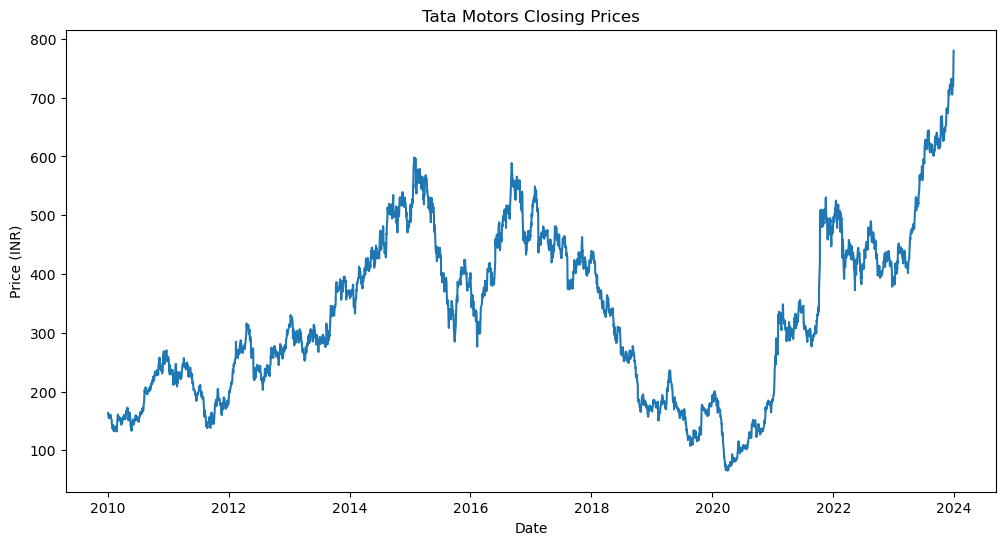

In [8]:
plt.figure(figsize=(12,6))
plt.plot(data['Close'])
plt.title('Tata Motors Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price (INR)')
plt.show()

Calculating Daily Returns

Daily Return = (Closing Price - Previous Closing Price)/Previous Closing Price


In [16]:
data['DailyReturn'] = data['Close'].pct_change()

pct_change() function to calculate the percentage change in closing prices.

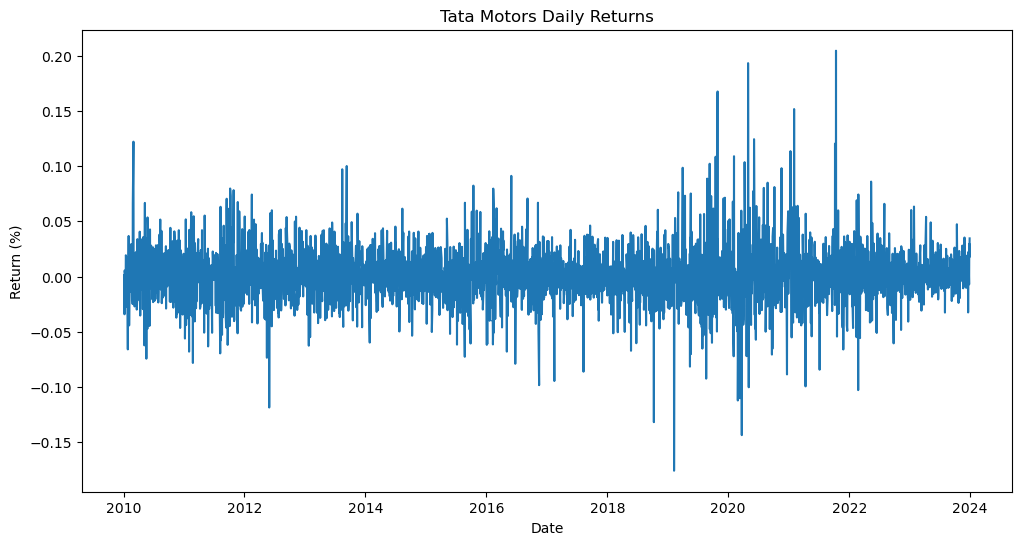

In [18]:
plt.figure(figsize=(12,6))
plt.plot(data['DailyReturn'])
plt.title('Tata Motors Daily Returns')
plt.xlabel('Date')
plt.ylabel('Return (%)')
plt.show()


calculate the standard deviation and variance of the daily returns:

In [20]:
std_dev = data['DailyReturn'].std()
variance = data['DailyReturn'].var()


Profitability Ratios:
Net Profit Margin (Net Profit / Revenue)

Return on Equity (ROE) (Net Income / Shareholder’s Equity)

Return on Assets (ROA) (Net Income / Total Assets)

Valuation Ratios:
Price-to-Earnings (P/E) Ratio (Stock Price / Earnings per Share)

Price-to-Book (P/B) Ratio (Stock Price / Book Value per Share)

Earnings Yield (Earnings per Share / Stock Price)

Liquidity Ratios:
Current Ratio (Current Assets / Current Liabilities)

Quick Ratio (Quick Assets / Current Liabilities)

Leverage Ratios:
Debt-to-Equity Ratio (Total Debt / Shareholder’s Equity)

Interest Coverage Ratio (EBIT / Interest Expense)

Efficiency Ratios:
Asset Turnover Ratio (Revenue / Total Assets)

Inventory Turnover Ratio (Cost of Goods Sold / Average Inventory)

Power BI stock market fundamental analysis dashboard for NCC 

1. Define Your Data Requirements
 financial data for NCC
Yahoo Finance (historical stock prices, financials)

2. Collect and Prepare Data

✅ Remove unnecessary columns
✅ Format dates properly
✅ Convert financial figures into consistent units (millions, billions)
✅ Calculate key financial ratios using DAX or Power Query



3. Design Your Power BI Dashboard
layout for your dashboard:
🔹 Stock Overview Section – Current price, market cap, P/E ratio
🔹 Profitability Metrics – Net Profit Margin, ROE, ROA
🔹 Valuation Ratios – P/E, P/B, Earnings Yield

Fetch NCC Data

In [ ]:
import yfinance as yf
import pandas as pd

# Fetch NCC stock data
ticker = "NCC.NS"  # Use correct ticker symbol for NCC on Yahoo Finance
ncc = yf.Ticker(ticker)

# Get historical stock prices
stock_data = ncc.history(period="5y")  # Fetch last 5 years of data
stock_data.to_csv("NCC_Stock_Data.csv")  # Save as CSV

# Get financial statements
income_statement = ncc.financials.T
balance_sheet = ncc.balance_sheet.T
cash_flow = ncc.cashflow.T

# Save financial data to CSV
income_statement.to_csv("NCC_Income_Statement.csv")
balance_sheet.to_csv("NCC_Balance_Sheet.csv")
cash_flow.to_csv("NCC_Cash_Flow.csv")


In [4]:

import yfinance as yf
import pandas as pd

# Fetch NCC stock data
ticker = "GOOGL"  # Use correct ticker symbol for NCC on Yahoo Finance
ncc = yf.Ticker(ticker)

# Get historical stock prices
stock_data = ncc.history(period="2y")  # Fetch last 5 years of data
stock_data.to_csv("GOOGL_Stock_Data.csv")  # Save as CSV

# Get financial statements
income_statement = ncc.financials.T
balance_sheet = ncc.balance_sheet.T
cash_flow = ncc.cashflow.T

# Save financial data to CSV
income_statement.to_csv("GOOGL_Income_Statement.csv")
balance_sheet.to_csv("GOOGL_Balance_Sheet.csv")
cash_flow.to_csv("GOOGL_Cash_Flow.csv")


In [3]:
# Fetch historical stock data
googl = yf.download("GOOGL", start="2023-01-01", end="2024-01-01", interval="1d")

# Display first few rows
print(googl.head())

[*********************100%***********************]  1 of 1 completed

                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2023-01-03  89.589996  91.050003  88.519997  89.120003  88.798103  28131200
2023-01-04  90.349998  90.650002  87.269997  88.080002  87.761856  34854800
2023-01-05  87.470001  87.570000  85.900002  86.199997  85.888649  27194400
2023-01-06  86.790001  87.690002  84.860001  87.339996  87.024521  41381500
2023-01-09  88.360001  90.050003  87.860001  88.019997  87.702065  29003900
